# 02. PyTorch Classification

Course video - [Source](https://www.youtube.com/watch?v=Z_ikDlimN6A)

GitHub Repo - [Source](https://github.com/Yer-Marti/PyTorch-Course)

PyTorch Doc - [Source](https://pytorch.org/docs/stable/index.html)

## Contents

* [Contents](#scrollTo=EPfLUN--N94O&line=1&uniqifier=1)
* [0. Theory](#scrollTo=qlCsMAeZTsKv&line=1&uniqifier=1)
* [1. Make classification data](#scrollTo=jNKR4zwJQlfR)
* [2. Building a model](#scrollTo=p3EvkO8ditvM)
* [3. Training a model](#scrollTo=9vrnqkVF7RcD)
* [4. Make predictions and evaluate the model](#scrollTo=fVcCk2UpaOYA)
* [5. Improving a model](#scrollTo=iaZ5Ffx4fxuc)
* [6. The missing piece: non-lineearity](#scrollTo=XqETAKHcmc4r)
* [7. Replicating non-linear activation functions](#scrollTo=vvRpBuPZ0Yoh)
* [8. Multi-class classification](#scrollTo=xhlTpb_LFkaB)
* [9. A few more classification metrics](#scrollTo=4w2WtDF52nG5)
* [Exercises](#scrollTo=7ZZbgt5JQyLr&line=1&uniqifier=1)

## 0. Theory

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options).

The type of classification problem is named after the desired output values:
* **Binary classification:** problems about deciding between two things (e.g. deciding if a mail is spam or not)
  * `in_features = N` - Text of the mail
  * `out_features = 1` - Spam or not
* **Multi-class classification:** problems about deciding between various options or classes (e.g. deciding if a given image is one of a cat, a dog, or a chicken)
  * `in_features = N` - Data of the image
  * `out_features = M` - Whether the image is of a cat, dog, or chicken
  * `M` is the number of options or classes from which to decide. In this case, 3.
* **Multi-label classification:** problems about labeling an input, in which each input can have multiple labels at once (e.g. labeling the themes of a wikipedia page)
  * `in_features = N` - Data of the wikipedia page
  * `out_features = M` - Whether the image should have each label
  * `M` is the number of labels from which to decide. For example: *machine learning*, *cooking*, *history*, *programming*...

## 1. Make classification data and get it ready

In [1]:
import sklearn
from sklearn.datasets import make_circles

> **Note:** `random_state` serves the same purpouse as `torch.manual_seed`. However, the latter affects only PyTorch related code, and the first one only Scikit-learn related code.

In [2]:
# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # Value of randomness
                    random_state=42) # Same as giving it a manual_seed

print(f"{len(X)}, {len(y)}")

print(f"First 10 samples of X: {X[:10]}\nFirst 10 samples of y: {y[:10]}")

1000, 1000
First 10 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]
 [-0.47964637  0.67643477]
 [-0.01364836  0.80334872]
 [ 0.77151327  0.14775959]
 [-0.16932234 -0.79345575]
 [-0.1214858   1.02150905]]
First 10 samples of y: [1 1 1 1 0 1 1 1 1 0]


As seen, each sample of `X` contains two values (`in_features=2`) and each sample of `y` contains a single value of `0` or `1` (`out_features=1`). Taking a look to the data we can conclude that this problem is one of **binary classification**.

In [3]:
# Make DataFrame of circle data
import pandas as pd

circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})

# Look at the first 10 examples
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


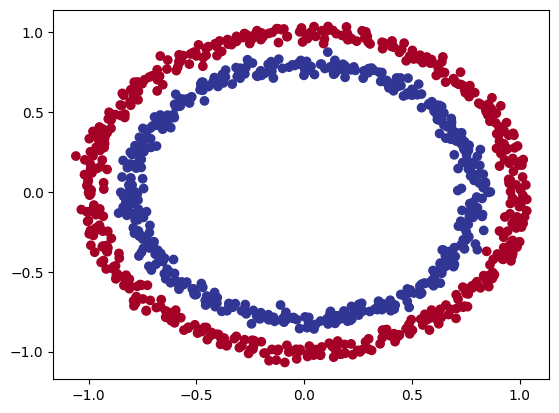

In [4]:
# Visualize
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

The problem visualization is about wether the two values on `X` represent a red or a blue dot.

> **Note:** the data we are working with is often referred to as a *toy dataset*, a dataset small enough to experiment on, but still sizeable enough to practice the fundamentals.

### Check input and output shapes

In [5]:
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
# View the first sample of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Features of first sample of X: {X_sample}\nShape of first sample of X: {X_sample.shape}\n")
print(f"Features of first sample of y: {y_sample}\nShape of first sample of y: {y_sample.shape}")

Features of first sample of X: [0.75424625 0.23148074]
Shape of first sample of X: (2,)

Features of first sample of y: 1
Shape of first sample of y: ()


### Turn data into tensors and create train and test splits

In [7]:
import torch
torch.__version__

'2.1.0+cu121'

In [8]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [9]:
# Spliting data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 0.2 = 20% test, 80% train
                                                    random_state=42) # Same as giving a manual_seed

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Let's build a model to classify our red and blue dots.

To do so, we want to:
1. Set up device-agnostic code
2. Construct a model by subclassing `nn.Module`
3. Define loss function and optimizer

In [10]:
import torch
from torch import nn

In [11]:
# Set up device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Constructing the model

Now that we have set up device-agnostic code, we are creating a model that:

1. Subclasses `nn.Module` (as almost every model in PyTorch)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Define a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instantiate an instance of our model class and send it to the target `device`

In [12]:
X_train.shape

torch.Size([800, 2])

In [13]:
y_train.shape

torch.Size([800])

In [14]:
# 1. Construct model
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    # 2. Create 2 nn.Linear layers
    self.layer_1 = nn.Linear(in_features=2,
                             out_features=5) # We can set this number arbitrarily, just need to keep in mind that the output of this layer must then match the input of the next layer (also, multiples of 8 are generally better for computing)

    self.layer_2 = nn.Linear(in_features=5,
                             out_features=1) # The last layer's output is the shape of 'y', as it is the desired output shape

  # 3. Define forward() method
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

# 4. Instantiate model and send it to target
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [15]:
next(model_0.parameters()).device

device(type='cuda', index=0)

We can visualize our models with this tool: [TensorFlow PlayGround](https://playground.tensorflow.org)

As we can see, the loss for our defined model is about `0.5` even after 3000 epochs, which means that our binary classifying model is as good as tossing a coin to decide whether the dot is red or blue.

So let's improve it using `nn.Sequential()`:

In [16]:
# Replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

We could also implement it by ourselves inside our own model class. The following code would be the way to go:

In [17]:
'''

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    self.two_linear_layers = nn.Sequential(
      nn.Linear(in_features=2, out_features=5),
      nn.Linear(in_features=5, out_features=1)
    )

  def forward(self, x):
    return self.two_linear_layers(x)

'''

'\n\nclass CircleModelV0(nn.Module):\n  def __init__(self):\n    super().__init__()\n\n    self.two_linear_layers = nn.Sequential(\n      nn.Linear(in_features=2, out_features=5),\n      nn.Linear(in_features=5, out_features=1)\n    )\n\n  def forward(self, x):\n    return self.two_linear_layers(x)\n\n'

Our previously defined model has now two parameters (`weight` and `bias`) for each layer. Also note that the 'inner' tensors have 5 values. First tensor has 10 values, due to `in_features=2` and `out_features=5` (2 ⋅ 5 = 10).

In [18]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.2437, -0.6908],
                      [-0.2125, -0.2181],
                      [ 0.1898, -0.5029],
                      [ 0.0601,  0.4935],
                      [ 0.2096, -0.6257]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6551,  0.6501,  0.1179, -0.2022, -0.0578], device='cuda:0')),
             ('1.weight',
              tensor([[-0.2267, -0.3741,  0.0757, -0.1769, -0.2970]], device='cuda:0')),
             ('1.bias', tensor([0.1874], device='cuda:0'))])

In [19]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[ 0.3299],
        [ 0.4425],
        [ 0.0070],
        [ 0.4215],
        [-0.0369],
        [ 0.0322],
        [ 0.3841],
        [ 0.2879],
        [ 0.0093],
        [ 0.4496]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


> **Note:** we want the predictions to fit the format of the labels, so we must change that.

### Set up loss function and optimizer

Which loss function should we use?

Again... this is problem specific.

For example, for regression we might want **MAE** (Mean Absolute Error) or **MSE** (Mean Squared Error).

For classification, we might want **Binary Cross Entropy** or **Categorical Cross Entropy** (cross entropy).

In [20]:
# Set up the loss function
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in

# Set up optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

`nn.BCELoss()` requires inputs to have gone through the sigmoid activation function prior to inputing to BCELoss. It would be something *similar* to this:

In [21]:
'''
nn.Sequential(
  nn.Sigmoid(),
  nn.BCELoss()
)
'''

'\nnn.Sequential(\n  nn.Sigmoid(),\n  nn.BCELoss()\n)\n'

More info about `nn.BCEWithLogitsLoss()` can be found [here](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html).

In [22]:
# Calculating accuracy - out of 100 samples, how many does our model get right
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

## 3. Training a model

To train our model, we follow the usual steps for the training loop:

1. Forward pass
2. Calculate loss
3. Optimizer zero grad
4. Backpropagation
5. Optimizer step

### Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be **raw logits**.

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g. Sigmoid for binary classification and Softmax for multiclass classification).

Then we can convert our model's **prediction probabilities** to **prediction labels** by either rounding them or taking the `argmax()`.

In [23]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]

y_logits

tensor([[ 0.3299],
        [ 0.4425],
        [ 0.0070],
        [ 0.4215],
        [-0.0369]], device='cuda:0')

In [24]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

As we can see, the **raw logits** (predictions) are not in the same format as the **labels**.

So, we use the *Sigmoid* function:

In [25]:
# Use the sigmoid activation function in our model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5817],
        [0.6089],
        [0.5017],
        [0.6038],
        [0.4908]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

> **Note:** a common boundary is `0.5`, but it can be changed if needed.

In [26]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)
y_preds.squeeze()

tensor([1., 1., 1., 1., 0.], device='cuda:0')

### Building a training and testing loop

In [27]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Building training and evaluation loop
for epoch in range(epochs):
  ## Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # 2. Calculate loss/accuracy
  loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss() expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ## Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate loss/accuracy
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  ## Print
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} , Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

Epoch: 0 | Loss: 0.69895 , Acc: 53.50% | Test loss: 0.70835, Test acc: 49.00%

Epoch: 10 | Loss: 0.69601 , Acc: 52.88% | Test loss: 0.70401, Test acc: 47.00%

Epoch: 20 | Loss: 0.69476 , Acc: 51.75% | Test loss: 0.70167, Test acc: 47.00%

Epoch: 30 | Loss: 0.69414 , Acc: 51.75% | Test loss: 0.70021, Test acc: 47.50%

Epoch: 40 | Loss: 0.69378 , Acc: 51.12% | Test loss: 0.69918, Test acc: 46.50%

Epoch: 50 | Loss: 0.69356 , Acc: 51.00% | Test loss: 0.69841, Test acc: 46.00%

Epoch: 60 | Loss: 0.69340 , Acc: 51.50% | Test loss: 0.69781, Test acc: 45.50%

Epoch: 70 | Loss: 0.69329 , Acc: 51.25% | Test loss: 0.69733, Test acc: 45.50%

Epoch: 80 | Loss: 0.69322 , Acc: 51.12% | Test loss: 0.69694, Test acc: 45.50%

Epoch: 90 | Loss: 0.69316 , Acc: 51.12% | Test loss: 0.69662, Test acc: 45.50%



> **Note:** in line 21, if we were using `nn.BCELoss()` instead, we would need to input *prediction probabilities* to the loss function. The code would be as follows:

In [28]:
'''
loss = loss_fn(torch.sigmoid(y_logits), y_train)
'''

'\nloss = loss_fn(torch.sigmoid(y_logits), y_train)\n'

## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything, so to inspect it we are making some predictions and visualizing them.

To do so, we are importing a function called `plot_decision_boundary()` from [here](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py).

In [29]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

Download helper_functions.py


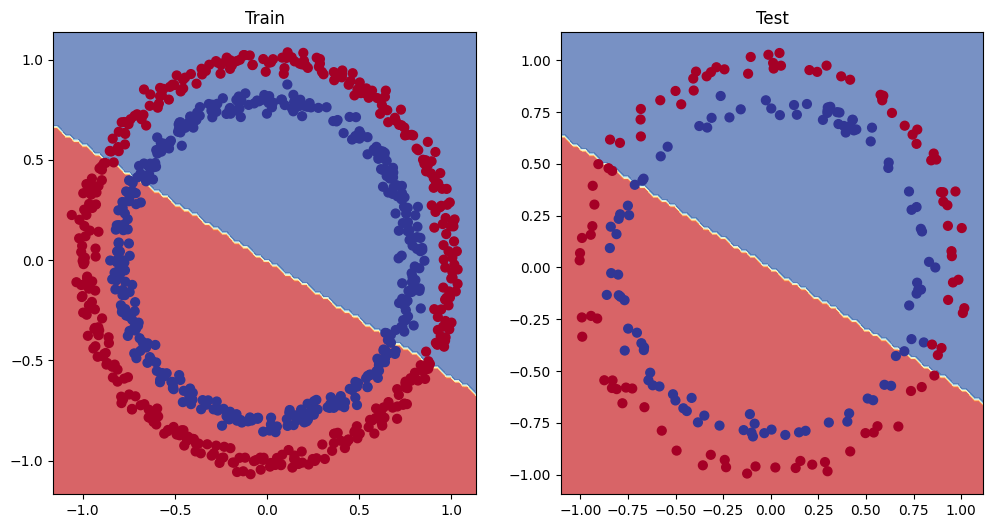

In [30]:
#Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # rows, cols, index
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

As we might see, the model is trying to separate the data with a Linear line, because we used a combination of `nn.Linear()` layers.

## 5. Improving a model (from a model perspective)

How can we improve our model if we are not satisfied with the results?

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - hidden units are cells contained in the hidden layers
* Fit for longer - more epochs
* Changing the activation functions - sigmoid, etc.
* Change the learning rate
* Change the loss function

These options deal directly with the model, rather than the data. And because these options are all values we (as machine learning engineers and data scientists) can change, they are referred as **hyperparameters**.

So, we are going to try and improve our model by:

* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

> **Note:** doing the three of them at the same time is not really the way to go, and this has to do with *experiment tracking*. We want to know what each improvement affected our model and how much.

In [31]:
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]], device='cuda:0'),
 tensor([1., 0., 0., 0., 1.], device='cuda:0'))

In [32]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x))) # x -> layer_1 -> layer_2 -> layer_3 -> output | this way of writing the operations leverages speed ups where possible behind the scenes

In [33]:
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

We can visualize the changes in the model's state dictionary:

In [34]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [35]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [36]:
# Writing training and testing loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1000

# Put data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ## Training
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate loss/accuracy
  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ## Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate loss/accuracy
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Print
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} , Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

Epoch: 0 | Loss: 0.69396 , Acc: 50.88% | Test loss: 0.69261, Test acc: 51.00%

Epoch: 100 | Loss: 0.69305 , Acc: 50.38% | Test loss: 0.69379, Test acc: 48.00%

Epoch: 200 | Loss: 0.69299 , Acc: 51.12% | Test loss: 0.69437, Test acc: 46.00%

Epoch: 300 | Loss: 0.69298 , Acc: 51.62% | Test loss: 0.69458, Test acc: 45.00%

Epoch: 400 | Loss: 0.69298 , Acc: 51.12% | Test loss: 0.69465, Test acc: 46.00%

Epoch: 500 | Loss: 0.69298 , Acc: 51.00% | Test loss: 0.69467, Test acc: 46.00%

Epoch: 600 | Loss: 0.69298 , Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%

Epoch: 700 | Loss: 0.69298 , Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%

Epoch: 800 | Loss: 0.69298 , Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%

Epoch: 900 | Loss: 0.69298 , Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%



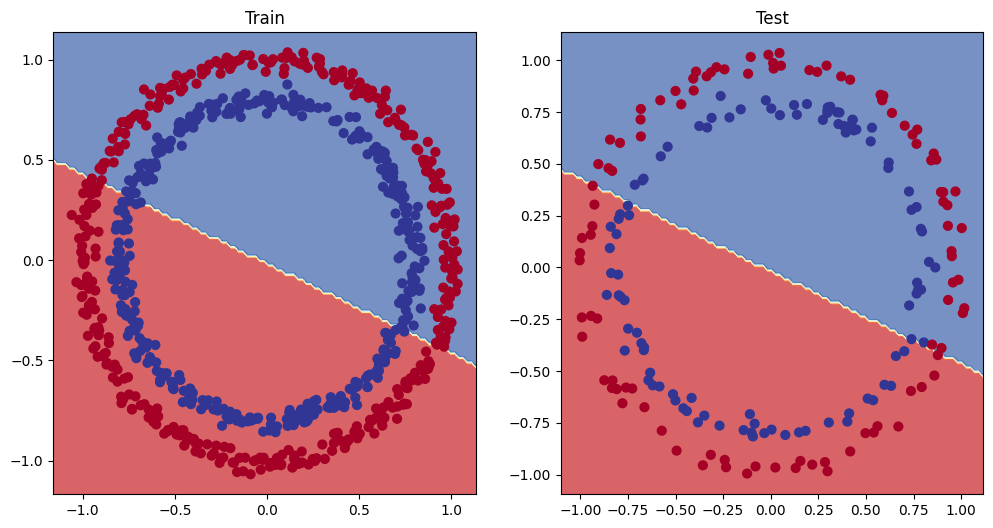

In [37]:
# Plot decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # rows, cols, index
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### Preparing data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test out a smaller problem.

In [38]:
# Create data
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.01

X_regression = torch.arange(start=start, end=end, step=step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [39]:
# Split data
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

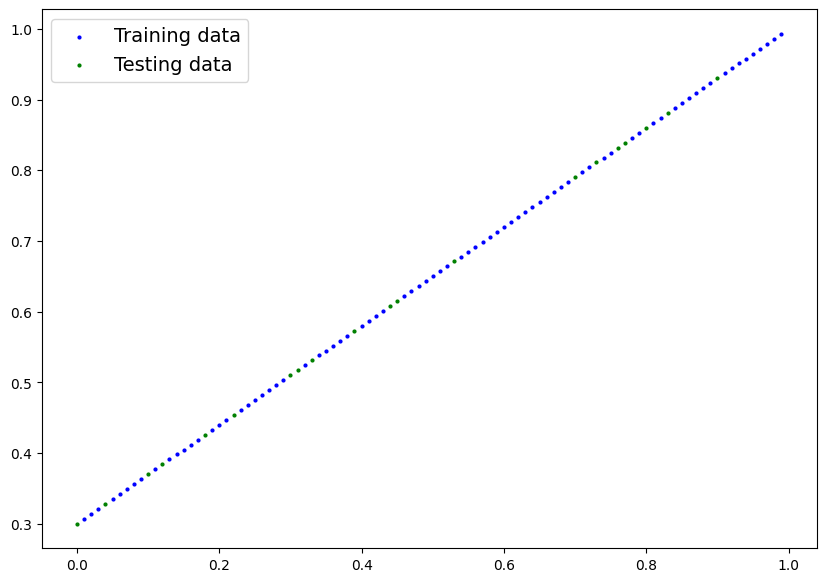

In [40]:
# Visualize the data
plot_predictions(X_train_regression, y_train_regression, X_test_regression, y_test_regression)

### Adjusting `model_1` to fit a straight line

Currently, `model_1` takes 2 input features, and this simple dataset has only 1 input for each label. So, how can we adjust this without changing the model itself?

In [41]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

Creating another model which is *essentially* identical to `model_1`.

In [42]:
# Same architecture as model_1 (using nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

Now we continue with our usual workflow, using `model_2` instead.

In [43]:
# Set up loss function
loss_fn_regression = nn.L1Loss()

# Set up optimizer
optimizer_regression = torch.optim.SGD(params=model_2.parameters(), lr=0.01)

In [44]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put data on target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

epochs = 1000

for epoch in range(epochs):
  ### Training
  model_2.train()

  # 1. Forward pass
  y_pred = model_2(X_train_regression)

  # 2. Calculate loss/accuracy
  loss = loss_fn_regression(y_pred, y_train_regression)

  # 3. Optimizer zero grad
  optimizer_regression.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer_regression.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_pred = model_2(X_test_regression)

    # 2. Calculate loss/accuracy
    test_loss = loss_fn_regression(test_pred, y_test_regression)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}\n")

Epoch: 0 | Loss: 0.80353 | Test loss: 0.73955

Epoch: 100 | Loss: 0.02930 | Test loss: 0.01250

Epoch: 200 | Loss: 0.02346 | Test loss: 0.01752

Epoch: 300 | Loss: 0.02341 | Test loss: 0.01660

Epoch: 400 | Loss: 0.02382 | Test loss: 0.01524

Epoch: 500 | Loss: 0.02303 | Test loss: 0.01515

Epoch: 600 | Loss: 0.02270 | Test loss: 0.01460

Epoch: 700 | Loss: 0.02148 | Test loss: 0.01497

Epoch: 800 | Loss: 0.02128 | Test loss: 0.01445

Epoch: 900 | Loss: 0.02146 | Test loss: 0.01354



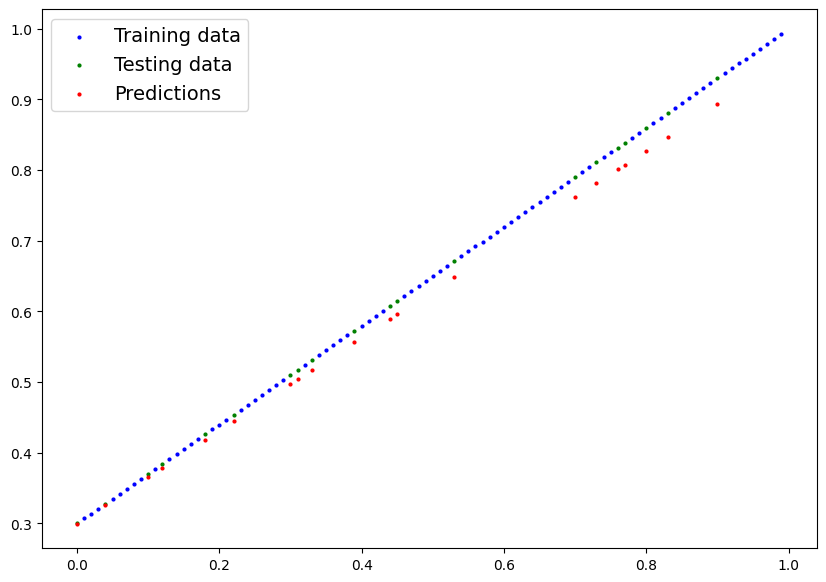

In [45]:
# Make predictions and visualize them
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

plot_predictions(X_train_regression.cpu(), y_train_regression.cpu(), X_test_regression.cpu(), y_test_regression.cpu(), y_preds.cpu())

This confirms that the model can indeed learn, it's just that we are not using the right tools to solve the problem.

We need non-linearity...

## 6. The missing piece: non-linearity

"What patterns could you draw if you were given an infinite amount of a straight and non-straight lines?"

Or in machine learning terms, an infinite (but really is finite) amount of linear and non-linear functions?

### Recreating non-linear data

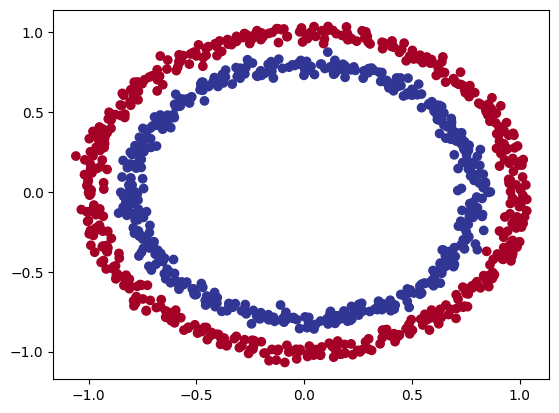

In [46]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0],
            X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [47]:
# Convert data to tensors and split the data
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

print(f"First 5 samples of X: {X[:5]} | Lenght: {len(X)}\n")
print(f"First 5 samples of y: {y[:5]} | Lenght: {len(y)}\n")

First 5 samples of X: tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]]) | Lenght: 1000

First 5 samples of y: tensor([1., 1., 1., 1., 0.]) | Lenght: 1000



### Building a model with non-linearity

* Linear = straight lines
* Non-linear = non-straight lines

Artificial neural networks are a large combination of linear and non-linear functions which are potentially able to find patterns in data.

In [48]:
# Create the model class
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    # Where should we put our non-linear activation functions?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [49]:
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [50]:
# Set up loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.1)

### Training a model with non-linearity

In [51]:
# Random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(epochs):
  ### Training
  model_3.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate loss/accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_train, y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate loss/accuracy
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_pred)

  # Print
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} , Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

Epoch: 0 | Loss: 0.69295 , Acc: 50.00% | Test loss: 0.69319, Test acc: 50.00%

Epoch: 100 | Loss: 0.69115 , Acc: 52.88% | Test loss: 0.69102, Test acc: 52.50%

Epoch: 200 | Loss: 0.68977 , Acc: 53.37% | Test loss: 0.68940, Test acc: 55.00%

Epoch: 300 | Loss: 0.68795 , Acc: 53.00% | Test loss: 0.68723, Test acc: 56.00%

Epoch: 400 | Loss: 0.68517 , Acc: 52.75% | Test loss: 0.68411, Test acc: 56.50%

Epoch: 500 | Loss: 0.68102 , Acc: 52.75% | Test loss: 0.67941, Test acc: 56.50%

Epoch: 600 | Loss: 0.67515 , Acc: 54.50% | Test loss: 0.67285, Test acc: 56.00%

Epoch: 700 | Loss: 0.66659 , Acc: 58.38% | Test loss: 0.66322, Test acc: 59.00%

Epoch: 800 | Loss: 0.65160 , Acc: 64.00% | Test loss: 0.64757, Test acc: 67.50%

Epoch: 900 | Loss: 0.62362 , Acc: 74.00% | Test loss: 0.62145, Test acc: 79.00%



### Evaluating the model and visualizing the results

In [52]:
# Make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

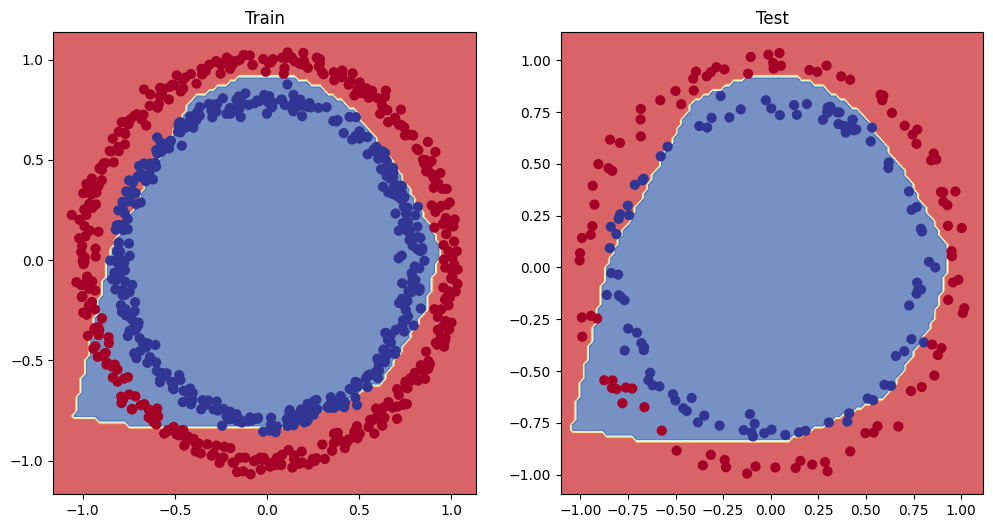

In [53]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## 7. Replicating non-linear activation functions

Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure aout the patterns on its own.

These tools are linear and non-linear functions.

In [54]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float)
A, A.dtype

(tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
           2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.]),
 torch.float32)

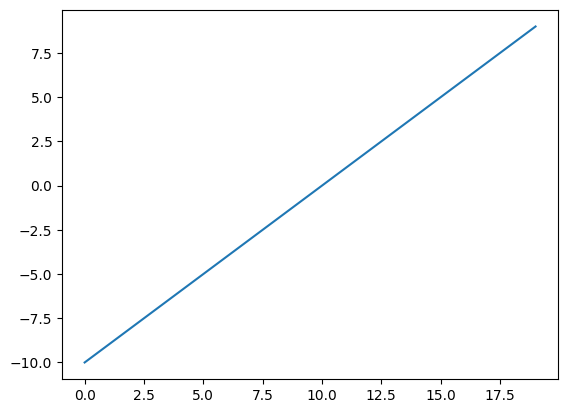

In [55]:
# Visualize the data
plt.plot(A);

### ReLU

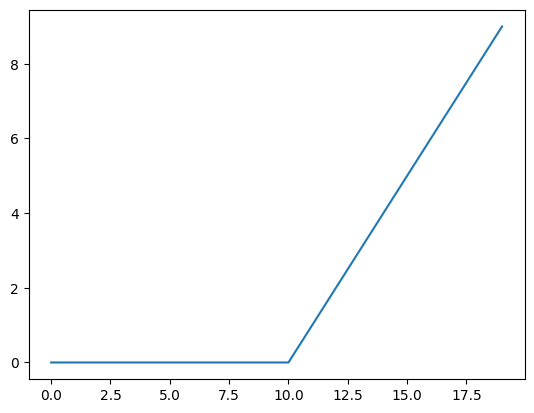

In [56]:
plt.plot(torch.relu(A));

Replicating the `nn.ReLU()` function.

More info about it [here](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html).

In [57]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x) # Inputs must be tensors

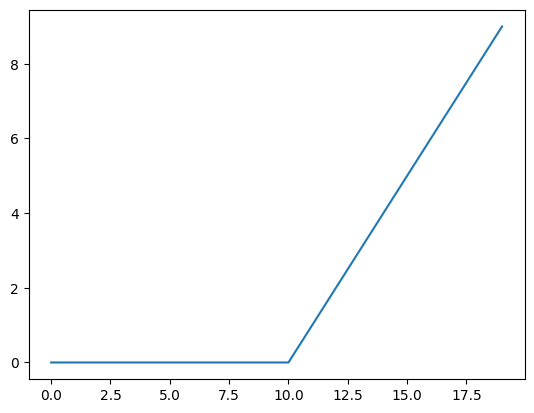

In [58]:
plt.plot(relu(A));

### Sigmoid

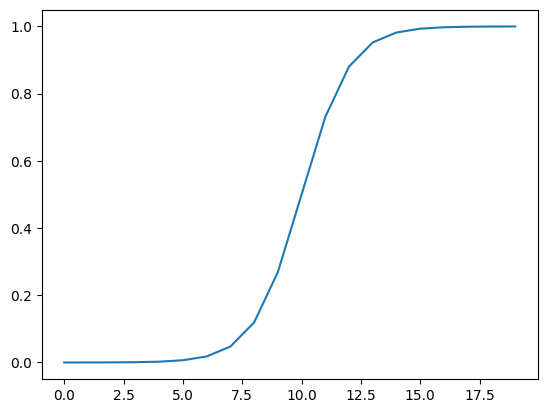

In [59]:
plt.plot(torch.sigmoid(A));

Replicating the `nn.Sigmoid()` function.

More info about it [here](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html).

In [60]:
def sigmoid(x: torch.Tensor) -> torch.Tensor:
  return 1 / (1 + torch.exp(-x))

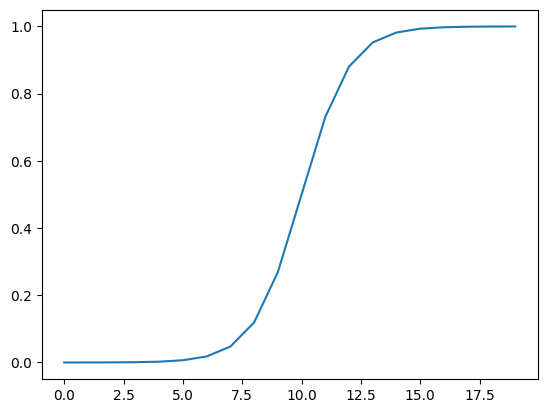

In [61]:
plt.plot(sigmoid(A));

## 8. Multi-class classification

**Summary:** multi-class refers to the number of classes from which decide an option being more than 2.

E.g. classifying an image from being one of a dog, cat, or chicken.

### Create a toy multi-class dataset

We are using [make_blobs()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) to create the data.

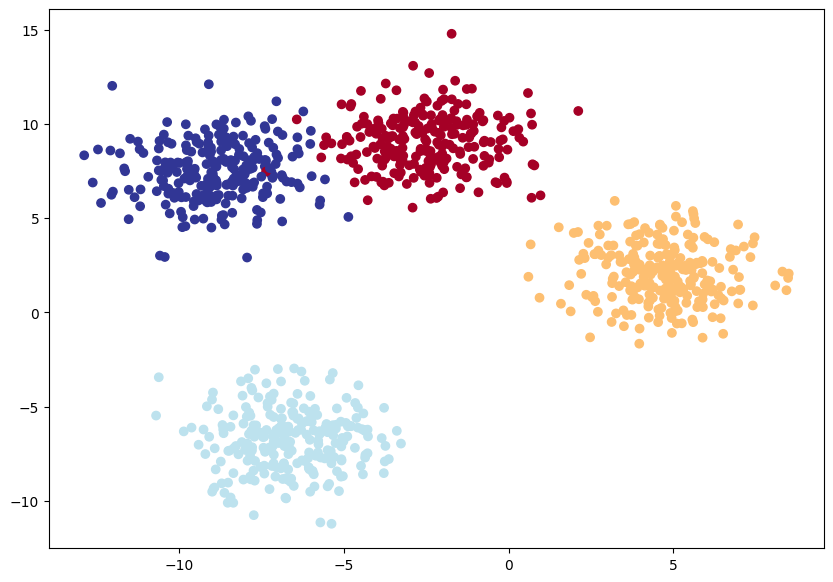

In [62]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, # give the clusters a little shake up (with 0, all dots are in the same point)
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor) # The reason for this part is after the train/test loop

# 3. Split data
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

> [!TIP]
> **Question:** could we separate the data using linearity?

### Create our multi-class classification model

In [63]:
# Create device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Here we start to use a [Python Style](https://google.github.io/styleguide/pyguide.html) to note our functions better.

In [64]:
from torch import nn

# Build the model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Initializes multi-class classification model.

    Args:
      input_features (int): Number of input features to the model
      output_features (int): Number of output features (number of output classes)
      hidden_units (int): Number of hidden units between layers, default 8
    """
    super().__init__()

    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

In [65]:
# Create an instance
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### Create a loss function and an optimizer

In [66]:
# Create loss function
loss_fn = nn.CrossEntropyLoss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.1)

### Getting prediction probabilities for a multi-class PyTorch model

In order to evaluate, train, and test our model, we need to convert our model's outputs (logits) to prediction probabilities and then to prediction labels.

Logits -> Prediction probabilities -> Prediction labels

In [67]:
# Let's get raw outputs (logits) from our model
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [68]:
# Convert the logits to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

y_logits[:5], y_pred_probs[:5]

(tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
         [-0.0973, -0.9431, -0.5963, -0.1371],
         [ 0.2528, -0.2379,  0.1882, -0.0066],
         [-0.4134, -0.5204, -0.9303, -0.6963],
         [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0'),
 tensor([[0.3169, 0.3244, 0.1405, 0.2182],
         [0.3336, 0.1432, 0.2026, 0.3206],
         [0.3011, 0.1843, 0.2823, 0.2323],
         [0.3078, 0.2766, 0.1836, 0.2320],
         [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0'))

Because they are **probabilities**, the sum of each tensor is bound to be `1`.

In [69]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0')

Each value represents the probability of the input being of each class. In other words, how much our model thinks it's of each class. So, we can take the maximum value to be the choice made by our model.

In [70]:
print(f"Maximum probability: {torch.max(y_pred_probs[0])} | Index pos: {torch.argmax(y_pred_probs[0])}")

Maximum probability: 0.32437506318092346 | Index pos: 1


This would mean that the model has chosen the *second class* based on the input (reminder that Python is zero indexed).

### Converting probabilities to prediction labels

In [71]:
# Converting our model's prediction probabilities into prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

In [72]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### Creating a training loop and testing loop for a multi-class PyTorch model

In [73]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set data to current device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

epochs = 100

for epoch in range(epochs):
  ### Training
  model_4.train()

  # 1. Forward pass
  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # 2. Calculate loss/accuracy
  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_blob_train, y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_4.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    # 2. Calculate loss/accuracy
    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_blob_test, test_pred)

  # Print
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} , Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

Epoch: 0 | Loss: 1.15883 , Acc: 40.38% | Test loss: 1.07554, Test acc: 48.00%

Epoch: 10 | Loss: 0.64476 , Acc: 96.75% | Test loss: 0.66069, Test acc: 97.50%

Epoch: 20 | Loss: 0.42535 , Acc: 98.50% | Test loss: 0.43074, Test acc: 100.00%

Epoch: 30 | Loss: 0.25294 , Acc: 99.12% | Test loss: 0.24508, Test acc: 99.50%

Epoch: 40 | Loss: 0.11232 , Acc: 99.25% | Test loss: 0.10229, Test acc: 99.50%

Epoch: 50 | Loss: 0.06627 , Acc: 99.25% | Test loss: 0.05848, Test acc: 99.50%

Epoch: 60 | Loss: 0.05068 , Acc: 99.25% | Test loss: 0.04293, Test acc: 99.50%

Epoch: 70 | Loss: 0.04300 , Acc: 99.25% | Test loss: 0.03491, Test acc: 99.50%

Epoch: 80 | Loss: 0.03836 , Acc: 99.25% | Test loss: 0.02988, Test acc: 99.50%

Epoch: 90 | Loss: 0.03525 , Acc: 99.25% | Test loss: 0.02663, Test acc: 99.50%



> **IMPORTANT!!!:** In the training/testing loop we encounter the following error:

```
---------------------------------------------------------------------------
RuntimeError                              Traceback (most recent call last)
<ipython-input-122-873d8a99493a> in <cell line: 10>()
     17
     18   # 2. Calculate loss/accuracy
---> 19   loss = loss_fn(y_logits, y_blob_train)
     20   acc = accuracy_fn(y_blob_train, y_pred)
     21

3 frames
/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py in cross_entropy(input, target, weight, size_average, ignore_index, reduce, reduction, label_smoothing)
   3051     if size_average is not None or reduce is not None:
   3052         reduction = _Reduction.legacy_get_string(size_average, reduce)
-> 3053     return torch._C._nn.cross_entropy_loss(input, target, weight, _Reduction.get_enum(reduction), ignore_index, label_smoothing)
   3054
   3055

RuntimeError: expected scalar type Long but found Float
```

Apparently, `nn.CrossEntropyLoss()` works with Long (`torch.LongTensor`) instead of the usual Float (`torch.float`) we use with PyTorch. This error was really hard to spot. We needed to change `y_blob`'s `dtype` to `torch.LongTensor` to be able to use this loss function. **Only** `y_blob` needs this change, as changing `X_blob` too will cause an error when performing the forward pass inside the model.

### Evaluating the model and visualizing the predictions

In [74]:
# Getting the predictions
model_4.eval()
with torch.inference_mode():
  y_preds = torch.softmax(model_4(X_blob_test), dim=1).argmax(dim=1)

y_preds[:10], y_blob_test[:10]

(tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0'),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0'))

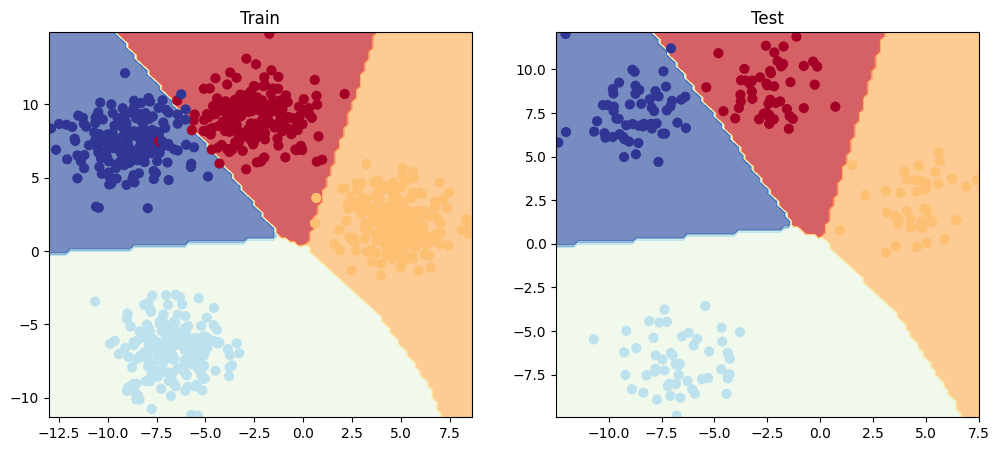

In [75]:
# Visualize it
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

> **Answer to [question](#scrollTo=VcfAYzvKKLo4):** yes, it is possible in this case, just because the data set is *linearly separable*. If we were to repeat the process without using `nn.ReLU()` layers in our model, the result would be very similar to this one.


## 9. A few more classification metrics... (to evaluate our classification model)

* Accuracy - out of 100 samples, how many does our model get right
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report

**Key:** **tp** = True Positive, **tn** = True Negative, **fp** = False Positive, **fn** = False Negative

| **Metric Name** | **Metric formula** | **Code** | **When to use** |
|: --- :|: --- :|: --- :|: --- :|
| Accuracy | **Accuracy** = $\frac{tp+tn}{tp+tn+fp+fn}$ | [`torchmetrics.Accuracy()`](https://torchmetrics.readthedocs.io/en/stable/classification/accuracy.html#id3) <br>or<br> [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) | Default metric for classification problems. Not the best for imbalanced classes. |
| Precision | **Precision** = $\frac{tp}{tp+fp}$ | [`torchmetrics.Precision()`](https://torchmetrics.readthedocs.io/en/stable/classification/precision.html#id4) <br>or<br> [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) | Higher precision leads to less false positives. |
| Recall | **Recall** = $\frac{tp}{tp+fn}$ | [`torchmetrics.Recall()`](https://torchmetrics.readthedocs.io/en/stable/classification/recall.html#id5) <br>or<br> [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) | Higher recall leads to less false negatives. |
| F1-score | **F1-Score** = $2\cdot\frac{precision \cdot recall}{precision + recall}$ | [`torchmetrics.F1Score()`](https://torchmetrics.readthedocs.io/en/stable/classification/f1_score.html#f1score) <br>or<br> [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) | Combination of precision and recall, usually a good overall metric for a classification model. |
| [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)  | NA | [`torchmetrics.ConfusionMatrix`](https://torchmetrics.readthedocs.io/en/stable/classification/confusion_matrix.html#confusionmatrix) <br>or<br> [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions) | When comparing predictions to truth labels to see where the model gets confused. Can be hard to use with large number of classes. |

In [76]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 5.0 MB/s eta 0:00:00


In [77]:
from torchmetrics import Accuracy

# Set up metric
torchmetric_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)

# Calculate accuracy
torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')

## Exercises

[Source](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/02_pytorch_classification.ipynb)

In [78]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [79]:
# Set up device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

1. Make a binary classification dataset with Scikit-Learn's `make_moons()` function.

* For consistency, the dataset should have 1000 samples and a `random_state=42`.
* Turn the data into PyTorch tensors. Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [80]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X_moon, y_moon = make_moons(n_samples=1000,
                            noise=0.07,
                            random_state=42)

X_moon = torch.from_numpy(X_moon).type(torch.float)
y_moon = torch.from_numpy(y_moon).type(torch.float)

X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moon,
                                                                        y_moon,
                                                                        test_size=0.2,
                                                                        random_state=42)

print(f"X_moon_train | Shape: {X_moon_train.shape} | Len: {len(X_moon_train)}")
print(f"y_moon_train | Shape: {y_moon_train.shape} | Len: {len(y_moon_train)}")
print(f"X_moon_test | Shape: {X_moon_test.shape} | Len: {len(X_moon_test)}")
print(f"y_moon_test | Shape: {y_moon_test.shape} | Len: {len(y_moon_test)}")

X_moon_train | Shape: torch.Size([800, 2]) | Len: 800
y_moon_train | Shape: torch.Size([800]) | Len: 800
X_moon_test | Shape: torch.Size([200, 2]) | Len: 200
y_moon_test | Shape: torch.Size([200]) | Len: 200


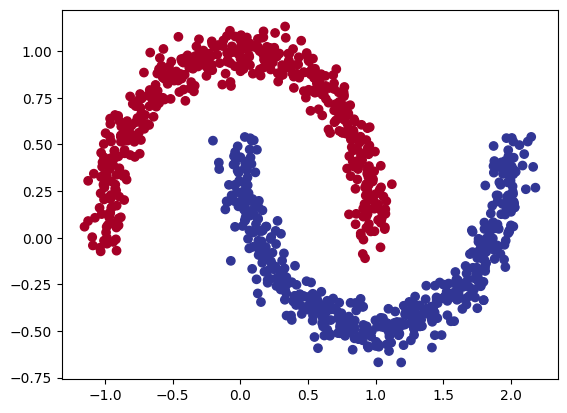

In [81]:
# Visualize the data
plt.scatter(x=X_moon[:, 0],
            y=X_moon[:, 1],
            c=y_moon,
            cmap=plt.cm.RdYlBu);

2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.

* Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [82]:
class MoonModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=input_features, out_features=hidden_units)
    self.layer_2 = nn.Linear(in_features=hidden_units, out_features=hidden_units)
    self.layer_3 = nn.Linear(in_features=hidden_units, out_features=hidden_units)
    self.layer_4 = nn.Linear(in_features=hidden_units, out_features=output_features)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_4(self.relu(self.layer_3(self.layer_2(self.relu(self.layer_1(x))))))

In [83]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_5 = MoonModel(2, 1, 16).to(device)

model_5

MoonModel(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=16, bias=True)
  (layer_4): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)

3. Setup a binary classification compatible loss function and optimizer to use when training the model.

In [84]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_5.parameters(), lr=0.1)

print(f"Loss_fn: {loss_fn}\n\nOptimizer: {optimizer}")

Loss_fn: BCEWithLogitsLoss()

Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.

* To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://lightning.ai/docs/torchmetrics/stable/).
* Train the model for long enough for it to reach over 96% accuracy.
* The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.


In [85]:
# Set accuracy function
from torchmetrics.classification import BinaryAccuracy

acc_fn = BinaryAccuracy()
acc_fn

BinaryAccuracy()

> **Note:** `BinaryAccuracy()` takes prediction parameters first, true labels second.

In [86]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_moon_train, y_moon_train = X_moon_train.to(device), y_moon_train.to(device)
X_moon_test, y_moon_test = X_moon_test.to(device), y_moon_test.to(device)

epochs = 1500

for epoch in range(epochs):
  ### Training
  model_5.train()

  y_logits = model_5(X_moon_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_moon_train)
  acc = acc_fn(y_pred.cpu(), y_moon_train.cpu())

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ### Testing
  model_5.eval()
  with torch.inference_mode():
    test_logits = model_5(X_moon_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_moon_test)
    test_acc = acc_fn(test_pred.cpu(), y_moon_test.cpu())

  # Print
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc*100:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc*100:.2f}%\n")

Epoch: 0 | Loss: 0.69461, Acc: 50.00% | Test loss: 0.69069, Test acc: 50.00%

Epoch: 100 | Loss: 0.28833, Acc: 86.00% | Test loss: 0.29359, Test acc: 85.50%

Epoch: 200 | Loss: 0.24352, Acc: 88.75% | Test loss: 0.23924, Test acc: 89.50%

Epoch: 300 | Loss: 0.22545, Acc: 89.25% | Test loss: 0.22284, Test acc: 89.50%

Epoch: 400 | Loss: 0.21504, Acc: 90.12% | Test loss: 0.21568, Test acc: 89.00%

Epoch: 500 | Loss: 0.20987, Acc: 90.50% | Test loss: 0.21300, Test acc: 89.00%

Epoch: 600 | Loss: 0.20722, Acc: 90.25% | Test loss: 0.21172, Test acc: 89.00%

Epoch: 700 | Loss: 0.20458, Acc: 90.38% | Test loss: 0.20980, Test acc: 89.00%

Epoch: 800 | Loss: 0.19752, Acc: 90.50% | Test loss: 0.20275, Test acc: 89.50%

Epoch: 900 | Loss: 0.17590, Acc: 91.50% | Test loss: 0.17814, Test acc: 91.50%

Epoch: 1000 | Loss: 0.11606, Acc: 95.25% | Test loss: 0.11117, Test acc: 96.50%

Epoch: 1100 | Loss: 0.04510, Acc: 99.38% | Test loss: 0.04064, Test acc: 100.00%

Epoch: 1200 | Loss: 0.01977, Acc: 100.0

5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

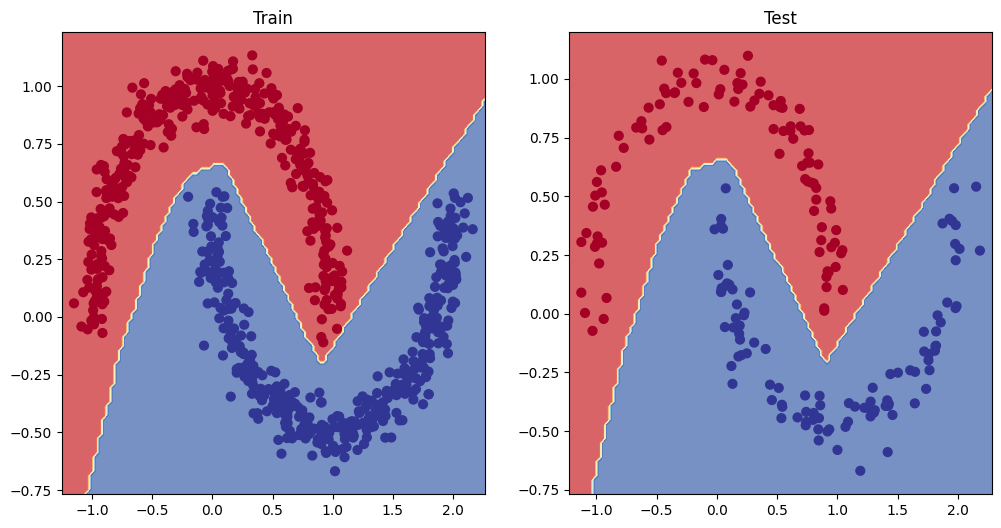

In [87]:
# Make predictions and visualize the data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_5, X_moon_train, y_moon_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_5, X_moon_test, y_moon_test)

6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.

In [88]:
def tahn(x):
  return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(x))

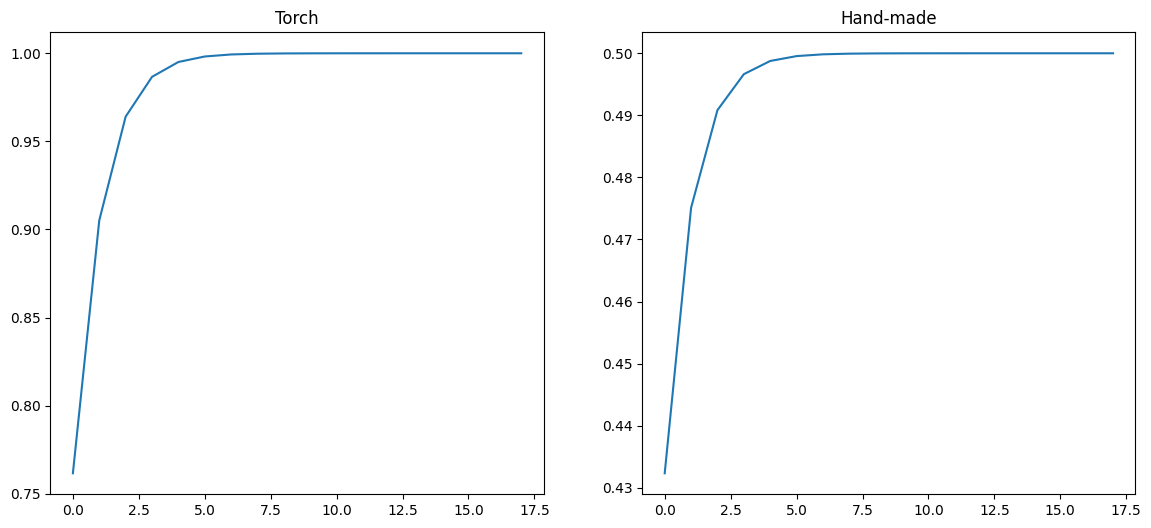

In [89]:
B = torch.arange(1, 10, 0.5)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.title("Torch")
plt.plot(torch.tanh(B))
plt.subplot(1, 2, 2)
plt.title("Hand-made")
plt.plot(tahn(B));

7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
* Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
* Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
* Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like).
* Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

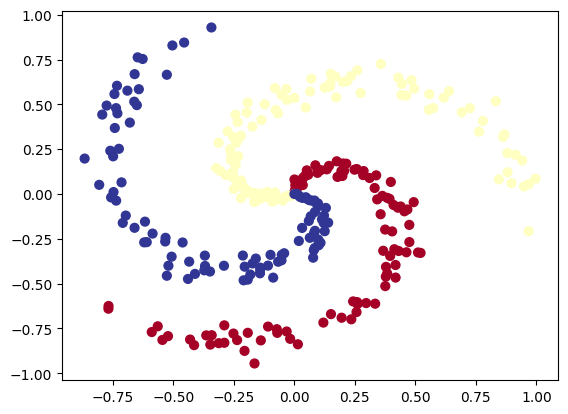

In [90]:
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [91]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)

X_spiral_train, X_spiral_test, y_spiral_train, y_spiral_test = train_test_split(X,
                                                                                y,
                                                                                test_size=0.2,
                                                                                random_state=42)

len(X_spiral_train), len(y_spiral_train), len(X_spiral_test), len(y_spiral_test)

(240, 240, 60, 60)

In [92]:
class SpiralModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=input_features, out_features=hidden_units)
    self.layer_2 = nn.Linear(in_features=hidden_units, out_features=hidden_units)
    self.layer_3 = nn.Linear(in_features=hidden_units, out_features=hidden_units)
    self.layer_4 = nn.Linear(in_features=hidden_units, out_features=output_features)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_4(self.relu(self.layer_3(self.layer_2(self.relu(self.layer_1(x))))))

In [93]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_6 = SpiralModel(2, 4, 16).to(device)

model_6

SpiralModel(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=16, bias=True)
  (layer_4): Linear(in_features=16, out_features=4, bias=True)
  (relu): ReLU()
)

In [94]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=model_6.parameters(), lr=0.1)

print(f"Loss_fn: {loss_fn}\n\nOptimizer: {optimizer}")

Loss_fn: CrossEntropyLoss()

Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    weight_decay: 0
)


In [95]:
acc_fn = Accuracy(task="multiclass", num_classes=4)

acc_fn

MulticlassAccuracy()

In [96]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_spiral_train, y_spiral_train = X_spiral_train.to(device), y_spiral_train.to(device)
X_spiral_test, y_spiral_test = X_spiral_test.to(device), y_spiral_test.to(device)

epochs = 100

for epoch in range(epochs):
  model_6.train()

  y_logits = model_6(X_spiral_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_spiral_train)
  acc = acc_fn(y_pred.cpu(), y_spiral_train.cpu())

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_6.eval()
  with torch.inference_mode():
    test_logits = model_6(X_spiral_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_spiral_test)
    test_acc = acc_fn(test_pred.cpu(), y_spiral_test.cpu())

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc*100:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc*100:.2f}%\n")

Epoch: 0 | Loss: 1.45632, Acc: 0.00% | Test loss: 1.15853, Test acc: 36.67%

Epoch: 10 | Loss: 0.85345, Acc: 65.42% | Test loss: 0.85258, Test acc: 60.00%

Epoch: 20 | Loss: 0.43815, Acc: 78.75% | Test loss: 0.46212, Test acc: 75.00%

Epoch: 30 | Loss: 0.21068, Acc: 92.08% | Test loss: 0.17337, Test acc: 95.00%

Epoch: 40 | Loss: 0.25599, Acc: 88.33% | Test loss: 0.07658, Test acc: 96.67%

Epoch: 50 | Loss: 0.07687, Acc: 95.83% | Test loss: 0.02552, Test acc: 100.00%

Epoch: 60 | Loss: 0.04163, Acc: 98.75% | Test loss: 0.01153, Test acc: 100.00%

Epoch: 70 | Loss: 0.03063, Acc: 98.75% | Test loss: 0.00638, Test acc: 100.00%

Epoch: 80 | Loss: 0.02556, Acc: 99.17% | Test loss: 0.00253, Test acc: 100.00%

Epoch: 90 | Loss: 0.02313, Acc: 99.17% | Test loss: 0.00224, Test acc: 100.00%



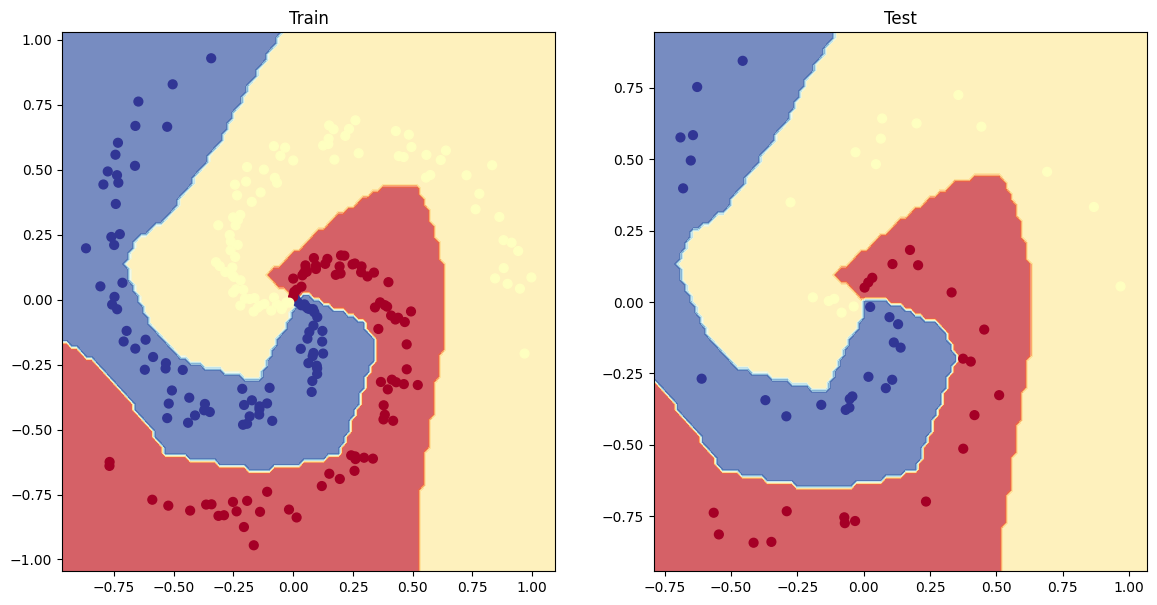

In [97]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_6, X_spiral_train, y_spiral_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_6, X_spiral_test, y_spiral_test)